<a href="https://colab.research.google.com/github/hrushikeshsahu19/Predicting-the-effectiveness-of-bank-marketing-campaigns/blob/main/Hrushikesh_Sahu_Team_1_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### <b> Social and economic context attributes </b>
* ### emp.var.rate: employment variation rate - quarterly indicator (numeric)
* ### cons.price.idx: consumer price index - monthly indicator (numeric)
* ### cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* ### euribor3m: euribor 3 month rate - daily indicator (numeric)
* ### nr.employed: number of employees - quarterly indicator (numeric)

### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/bank-full.csv',sep=';')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape

(45211, 17)

###our data set have 45211 have rows and 17 columns

In [ ]:
# duplicate
len(df[df.duplicated()])

0

### No duplicate value in our dataset

In [ ]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
target_y=df['y'].value_counts().reset_index()
target_y

,index,y
0,no,39922
1,yes,5289


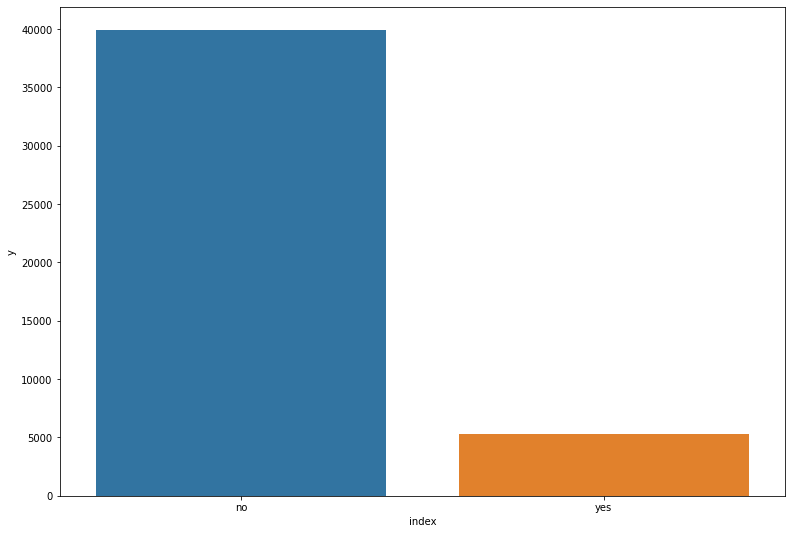

In [ ]:
plt.figure(figsize=(13,9))
sns.barplot(x='index',y='y',data=target_y)

###most of the obsarvation have No value but very few observation have yes value that means our class label is imbalanced

In [ ]:
job_df=df['job'].value_counts().reset_index()
job_df.rename(columns={'index':'job_type'},inplace=True)
job_df

,job_type,job
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154
5,retired,2264
6,self-employed,1579
7,entrepreneur,1487
8,unemployed,1303
9,housemaid,1240


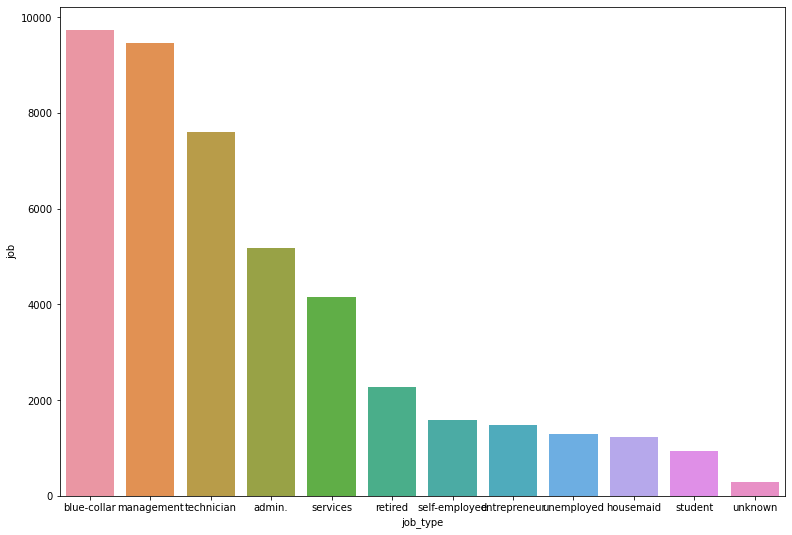

In [ ]:
plt.figure(figsize=(13,9))
sns.barplot(x='job_type',y='job',data=job_df)

### most of the  people have blue-collar  and management job
### least number of people  have student and unknown

In [ ]:
marital_df=df['marital'].value_counts().reset_index()
marital_df.rename(columns={'index':'marital_status'},inplace=True)
marital_df

,marital_status,marital
0,married,27214
1,single,12790
2,divorced,5207


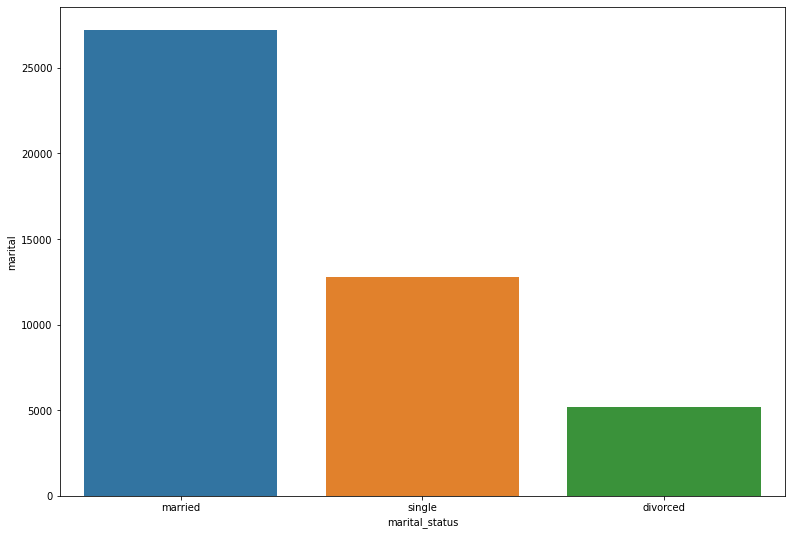

In [ ]:
plt.figure(figsize=(13,9))
sns.barplot(x='marital_status',y='marital',data=marital_df)

###from this graph we can observe that most of the people are married  and least number of people have divorced

In [ ]:
education_df=df['education'].value_counts().reset_index()
education_df.rename(columns={'index':'education_type'},inplace=True)
education_df

,education_type,education
0,secondary,23202
1,tertiary,13301
2,primary,6851
3,unknown,1857


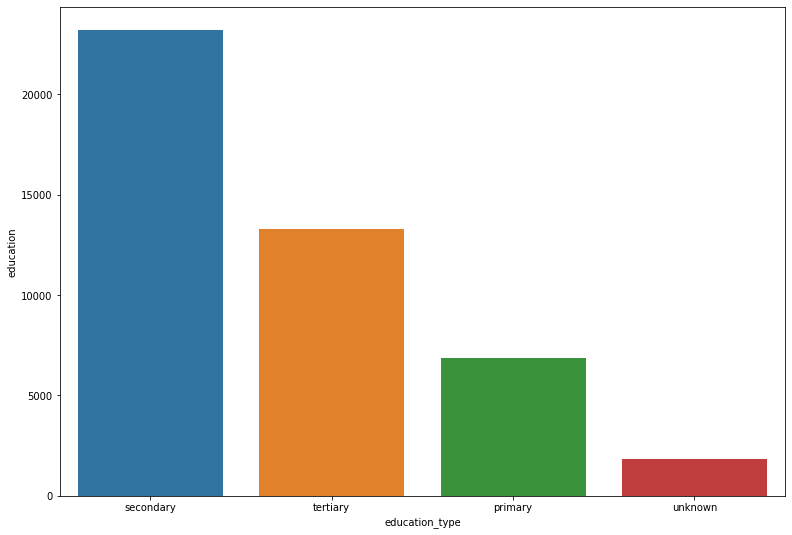

In [ ]:
plt.figure(figsize=(13,9))
sns.barplot(x='education_type',y='education',data=education_df)

### from this graph we can observed that most of the people have secondry and tertiary education and very few people have primary education

In [ ]:
default_df=df['default'].value_counts().reset_index()
default_df.rename(columns={'index':'type'},inplace=True)
default_df

,type,default
0,no,44396
1,yes,815


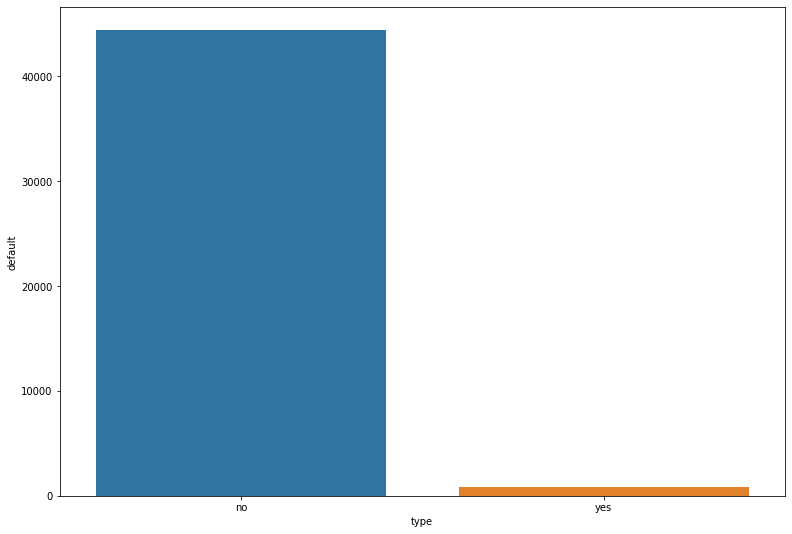

In [ ]:
plt.figure(figsize=(13,9))
sns.barplot(x='type',y='default',data=default_df)

In [ ]:
housing_df=df['housing'].value_counts().reset_index()
housing_df.rename(columns={'index':'is_housing'},inplace=True)
housing_df

,is_housing,housing
0,yes,25130
1,no,20081


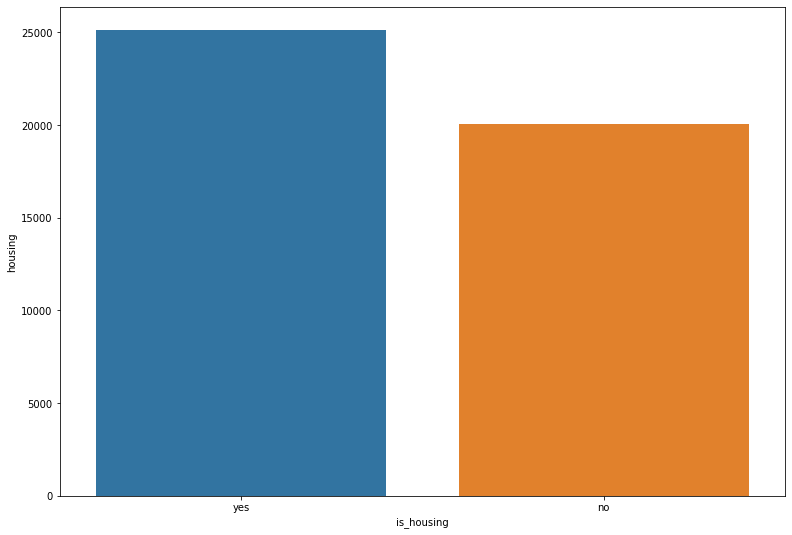

In [ ]:
plt.figure(figsize=(13,9))
sns.barplot(x='is_housing',y='housing',data=housing_df)

###**from above graph we can see that most of the people have house lone**

In [ ]:
loan_df=df['loan'].value_counts().reset_index()
loan_df.rename(columns={'index':'is_lone'},inplace=True)
loan_df

,is_lone,loan
0,no,37967
1,yes,7244


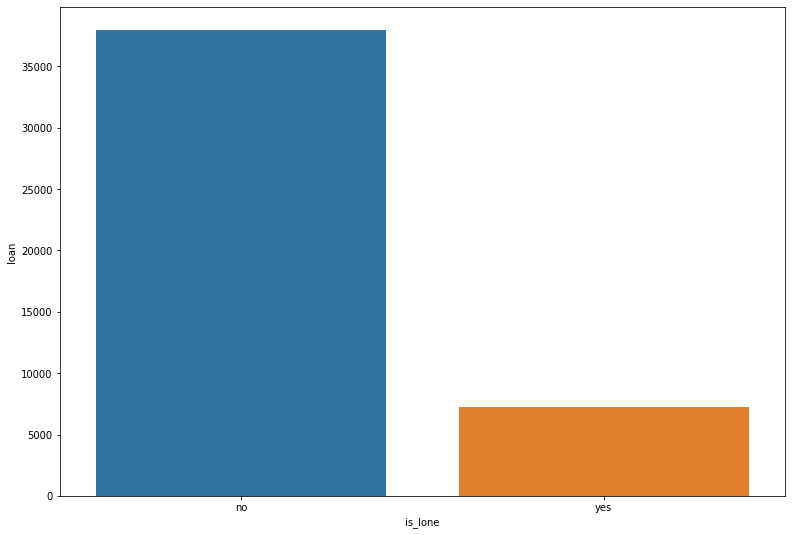

In [ ]:
plt.figure(figsize=(13,9))
sns.barplot(x='is_lone',y='loan',data=loan_df)

In [ ]:
contact_df=df['contact'].value_counts().reset_index()
contact_df.rename(columns={'index':'contact_type'},inplace=True)
contact_df

,contact_type,contact
0,cellular,29285
1,unknown,13020
2,telephone,2906


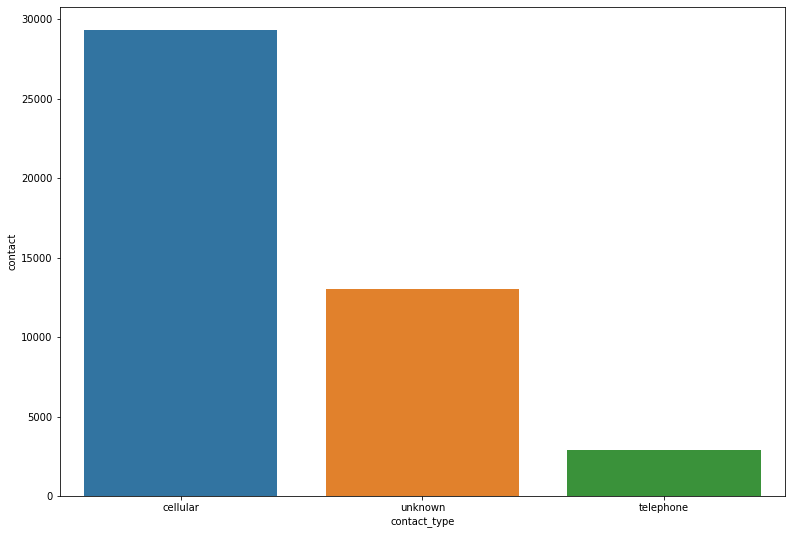

In [ ]:
plt.figure(figsize=(13,9))
sns.barplot(x='contact_type',y='contact',data=contact_df)

###from this graph we can observed that most of the contact type are cellular and least number of contact type are telephone

In [ ]:
month_df=df['month'].value_counts().reset_index()
month_df.rename(columns={'index':'month_type'},inplace=True)
month_df

,month_type,month
0,may,13766
1,jul,6895
2,aug,6247
3,jun,5341
4,nov,3970
5,apr,2932
6,feb,2649
7,jan,1403
8,oct,738
9,sep,579


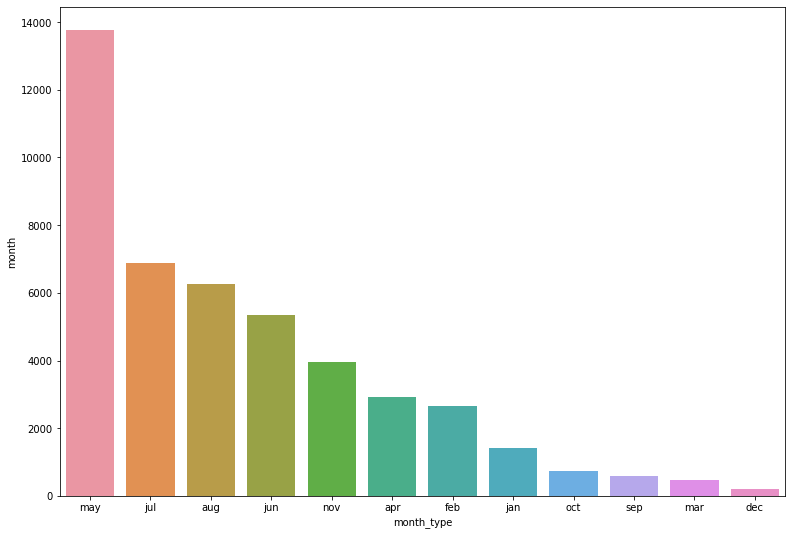

In [ ]:
plt.figure(figsize=(13,9))
sns.barplot(x='month_type',y='month',data=month_df)

In [ ]:
campaign_df=df['campaign'].value_counts().reset_index()

campaign_df

,index,campaign
0,1,17544
1,2,12505
2,3,5521
3,4,3522
4,5,1764
5,6,1291
6,7,735
7,8,540
8,9,327
9,10,266


In [ ]:
day_df=df['day'].value_counts().reset_index()
day_df.rename(columns={'index':'day_type'},inplace=True)
day_df

,day_type,day
0,20,2752
1,18,2308
2,21,2026
3,17,1939
4,6,1932
5,5,1910
6,14,1848
7,8,1842
8,28,1830
9,7,1817


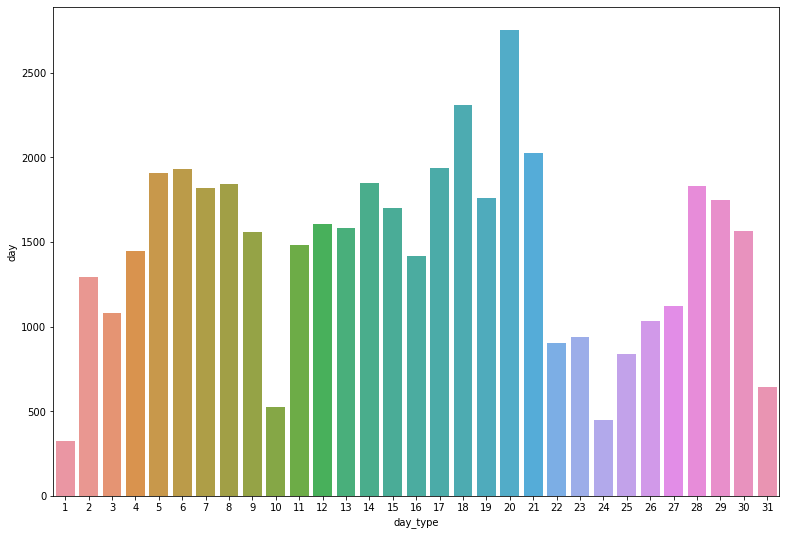

In [ ]:
plt.figure(figsize=(13,9))
sns.barplot(x='day_type',y='day',data=day_df)

In [ ]:
poutcome_df=df['poutcome'].value_counts().reset_index()
poutcome_df.rename(columns={'index':'poutcome_type'},inplace=True)
poutcome_df

,poutcome_type,poutcome
0,unknown,36959
1,failure,4901
2,other,1840
3,success,1511


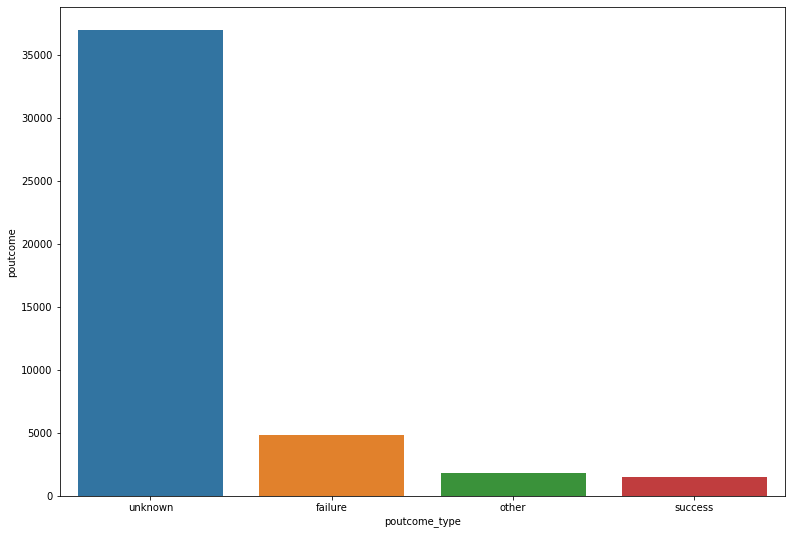

In [ ]:
plt.figure(figsize=(13,9))
sns.barplot(x='poutcome_type',y='poutcome',data=poutcome_df)

In [ ]:
pdays_df=df['pdays'].value_counts().reset_index()
pdays_df

,index,pdays
0,-1,36954
1,182,167
2,92,147
3,183,126
4,91,126
...,...,...
554,749,1
555,717,1
556,589,1
557,493,1


In [ ]:
previous_df=df['previous'].value_counts().reset_index()
previous_df

,index,previous
0,0,36954
1,1,2772
2,2,2106
3,3,1142
4,4,714
5,5,459
6,6,277
7,7,205
8,8,129
9,9,92


In [ ]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  color=hist_color, **hist_kws)


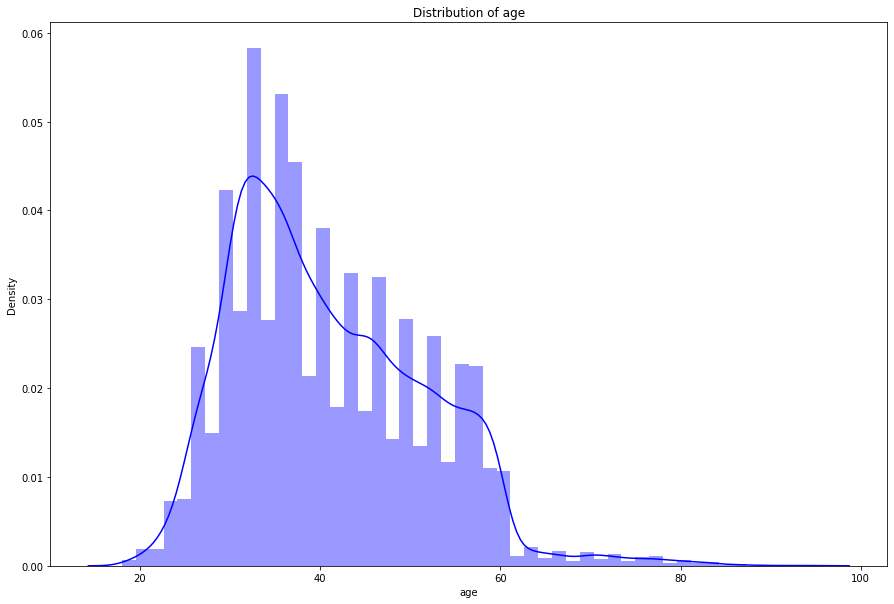

In [ ]:
# Independent variable 'age'
plt.figure(figsize=(15,10))
plt.title('Distribution of age')
sns.distplot(df['age'],color="B")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


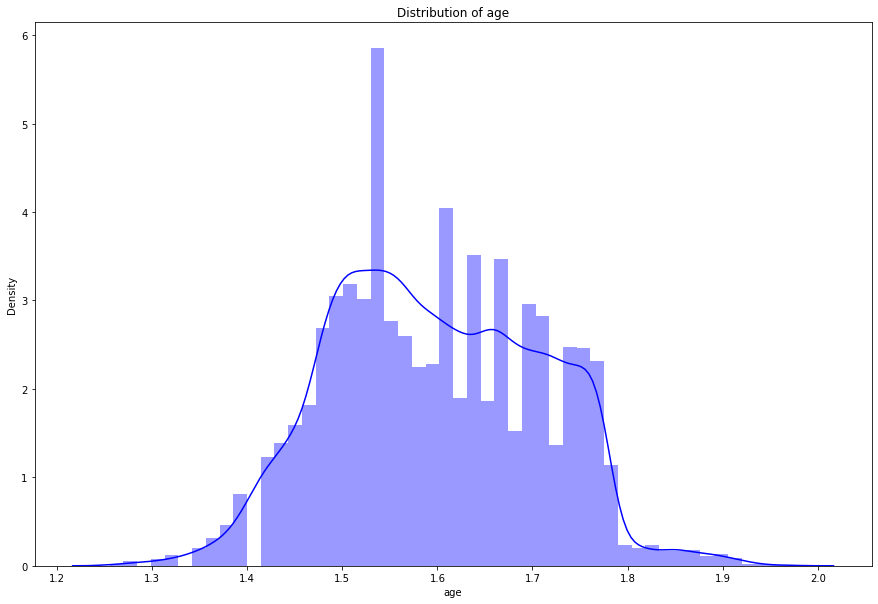

In [ ]:
# Independent variable 'age'
plt.figure(figsize=(15,10))
plt.title('Distribution of age')
sns.distplot(np.log10(df['age']),color="B")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


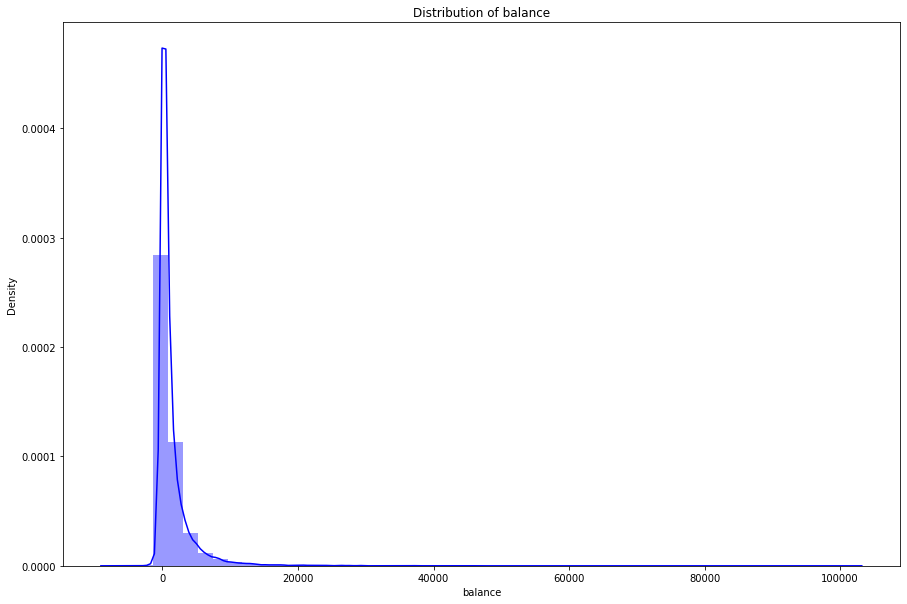

In [ ]:
# Independent variable 'balance'
plt.figure(figsize=(15,10))
plt.title('Distribution of balance')
sns.distplot(df['balance'],color="B")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


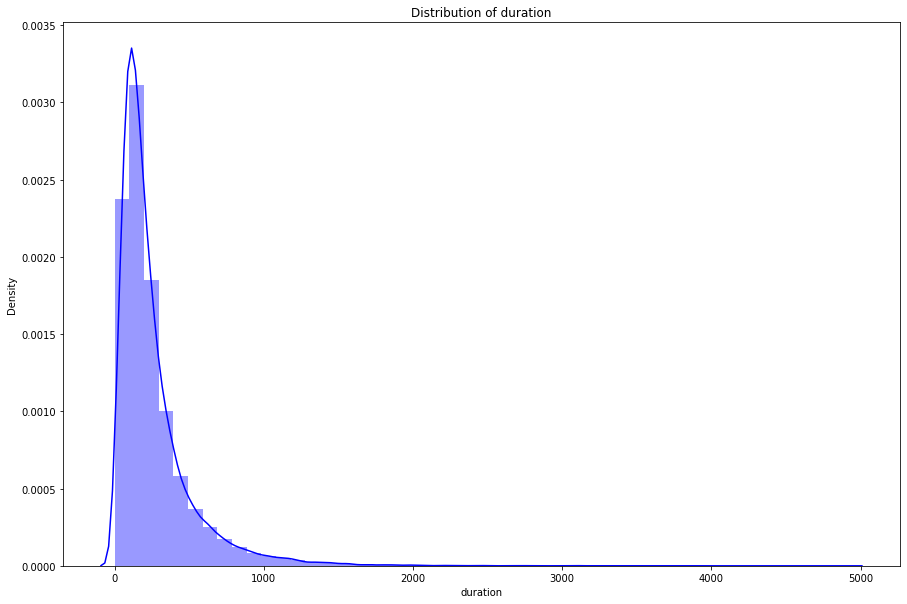

In [ ]:
# Independent variable 'duration'
plt.figure(figsize=(15,10))
plt.title('Distribution of duration')
sns.distplot(df['duration'],color="B")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


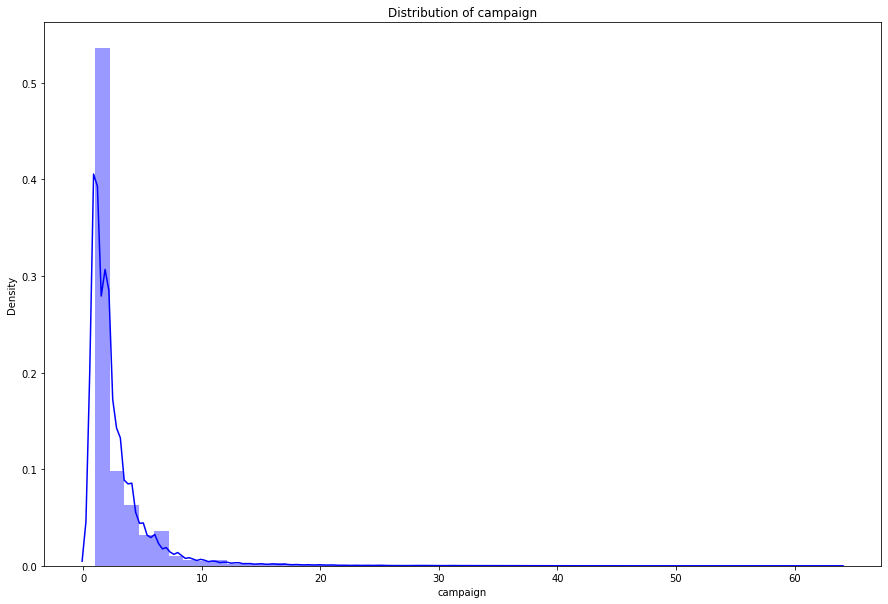

In [ ]:
# Independent variable 'campaign'
plt.figure(figsize=(15,10))
plt.title('Distribution of campaign')
sns.distplot(df['campaign'],color="B")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


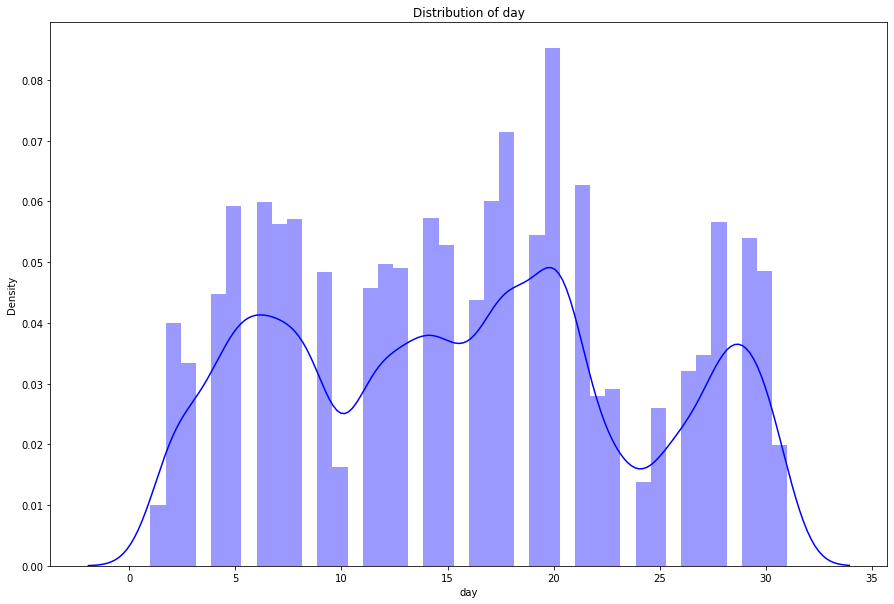

In [ ]:
# Independent variable 'day'
plt.figure(figsize=(15,10))
plt.title('Distribution of day')
sns.distplot(df['day'],color="B")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


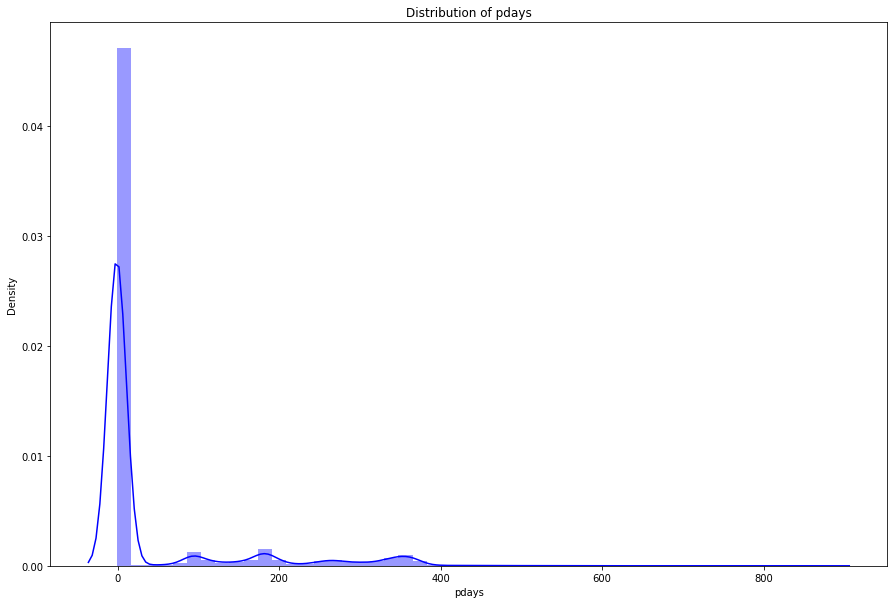

In [ ]:
# Independent variable 'pdays'
plt.figure(figsize=(15,10))
plt.title('Distribution of pdays')
sns.distplot(df['pdays'],color="B")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


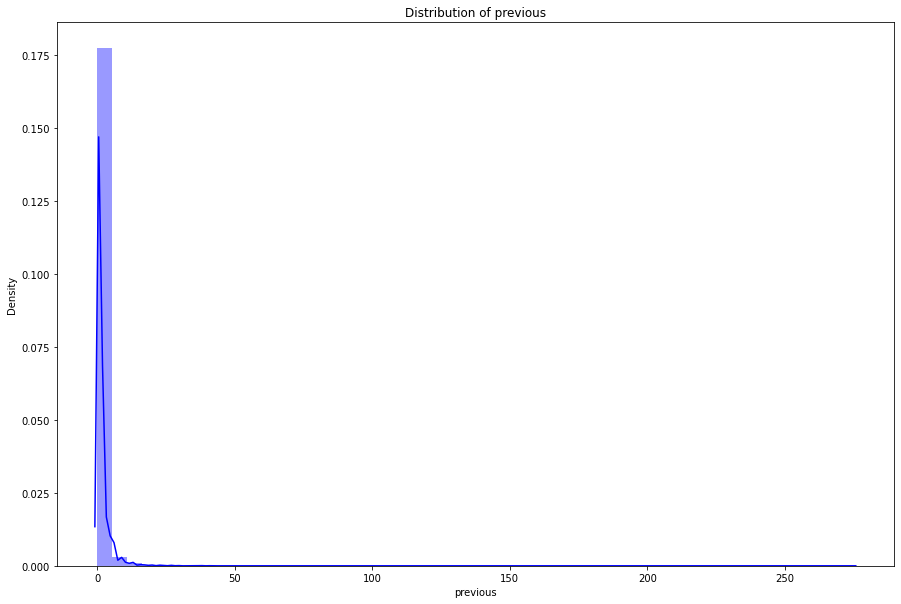

In [ ]:
# Independent variable 'previous'
plt.figure(figsize=(15,10))
plt.title('Distribution of previous')
sns.distplot(df['previous'],color="B")

In [ ]:
def plot_cat_data(df,dep_var):
  cat_columns = list(set(df.describe().columns)^set(df.columns))
  cat_columns.remove(dep_var)
  for i,e in enumerate(cat_columns):
    plt.figure(i)
    ax = sns.countplot(df[e],hue=df[dep_var])
    for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
              height + 3,
              '{:1.2f}'.format(height/df.shape[0]),
              ha="center")
    if(len(ax.patches)>10):
      plt.xticks(rotation=90)  
    plt.title(f'Count Plot for {e}')
    plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


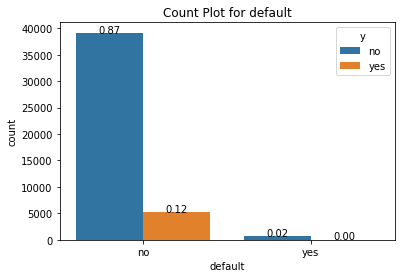

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


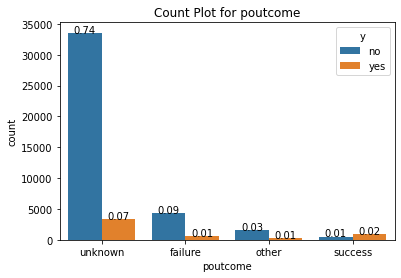

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


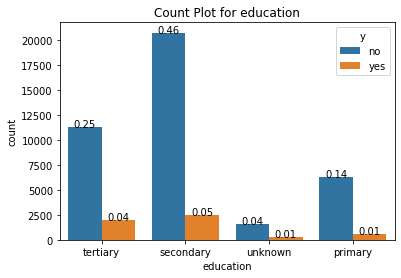

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


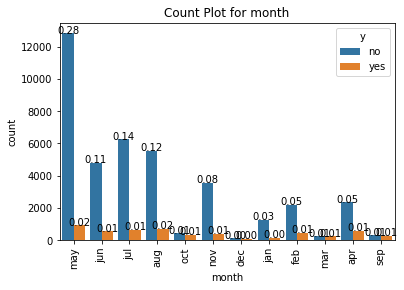

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


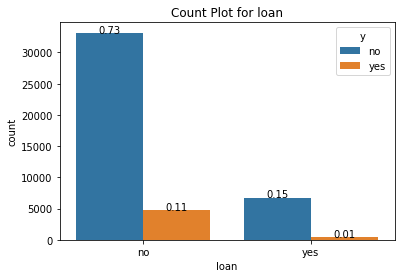

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


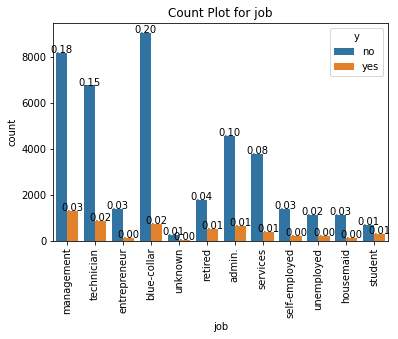

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


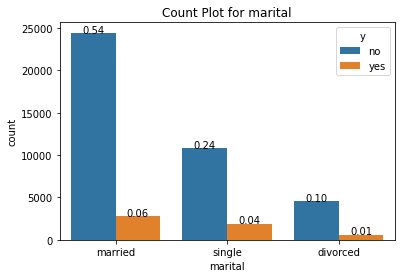

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


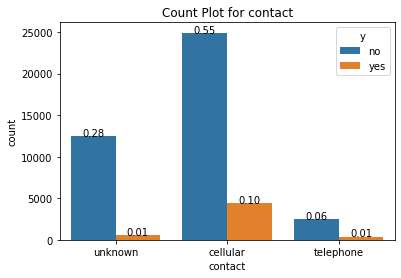

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


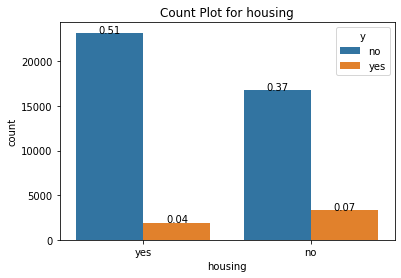

In [ ]:
plot_cat_data(df,'y')

In [ ]:
df.tail(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
45192,29,management,single,tertiary,no,765,no,no,cellular,16,nov,238,1,-1,0,unknown,yes
45193,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45196,25,student,single,secondary,no,358,no,no,cellular,16,nov,330,1,-1,0,unknown,yes
45197,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,yes
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
def pdays_contact(days):
  if days == -1:
    return 0
  else:
    return 1

In [ ]:
df['is_contacted_bef'] = df['pdays'].apply(pdays_contact)

In [ ]:
# One hot encoding
df = pd.get_dummies(df, columns=["job", "marital","education",'default','housing','loan','contact','poutcome'], prefix=["job", "marital","education",'default','housing','loan','contact','poutcome'])

In [ ]:
df['y'] = df['y'].apply(lambda x : 1 if x=='yes' else 0 )

In [ ]:
df.drop(['month','duration','age','day'],axis=1,inplace=True)

In [ ]:
df.head()

,balance,campaign,pdays,previous,y,is_contacted_bef,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2143,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1
1,29,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1
2,2,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
3,1506,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1
4,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1


#**IQR=Q3-Q1**

#**lower_limit_outlier=Q1-1.5*IQR**

#**upper_limit_outlier=Q3+1.5*IQR**

##**so we have to take the values which is greater then lower limit outlier and less then upper limit outlier**

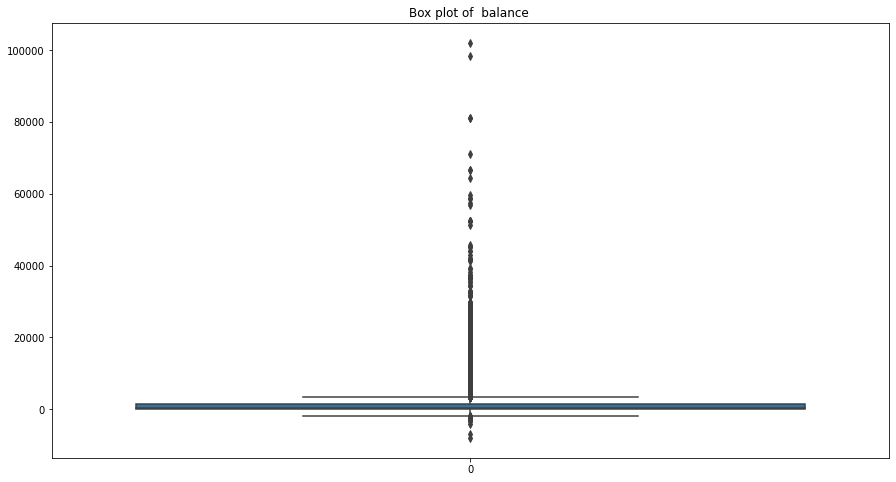

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  balance ")
ax = sns.boxplot(data=df['balance'], orient="v")

##from above graph we can see that our balance columns have some outlier.so we have to remove them

In [ ]:
#percentile_q1_balance = np.percentile(df['balance'],25)
#print(percentile_q1_balance)
#percentile_q2_balance = np.percentile(df['balance'],50)
#print(percentile_q2_balance)
#percentile_q3_balance = np.percentile(df['balance'],75)
#print(percentile_q3_balance)

In [ ]:
#iqr=percentile_q3_balance - percentile_q1_balance
#lower_limit_outlier=percentile_q1_balance-1.5*iqr
#upper_limit_outlier=percentile_q3_balance+1.5*iqr

In [ ]:
#print("lower limit for outlier  :",lower_limit_outlier)
#print("Upper limit for outlier  :",upper_limit_outlier)

In [ ]:
#df=df[df['balance']>lower_limit_outlier]
#df=df[df['balance']<upper_limit_outlier]

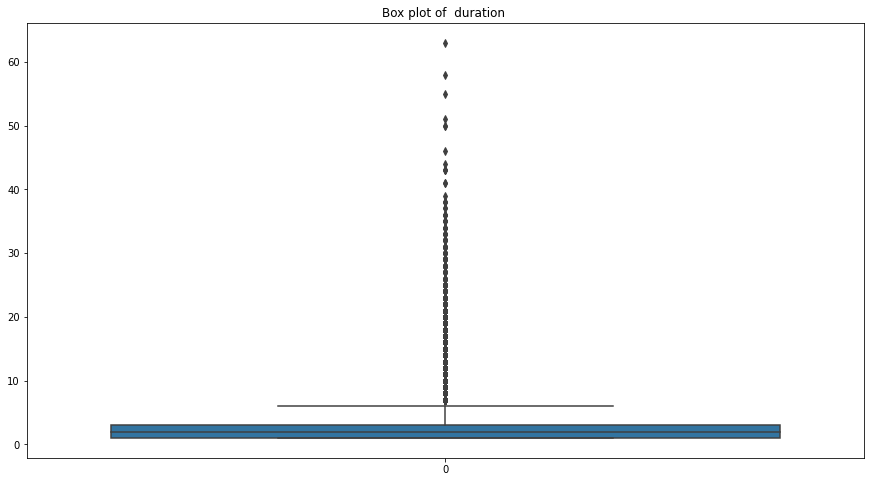

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  duration ")
ax = sns.boxplot(data=df['campaign'], orient="v")

In [ ]:
#percentile_q1_campaign = np.percentile(df['campaign'],25)
#print(percentile_q1_campaign)
#percentile_q2_campaign = np.percentile(df['campaign'],50)
#print(percentile_q2_campaign)
#percentile_q3_campaign = np.percentile(df['campaign'],75)
#print(percentile_q3_campaign)

In [ ]:
#iqr=percentile_q3_campaign - percentile_q1_campaign
#lower_limit_outlier=percentile_q1_campaign-1.5*iqr
#upper_limit_outlier=percentile_q3_campaign+1.5*iqr

In [ ]:
#print("lower limit for outlier  :",lower_limit_outlier)
#print("Upper limit for outlier  :",upper_limit_outlier)

In [ ]:
#df=df[df['campaign']>lower_limit_outlier]
#df=df[df['campaign']<upper_limit_outlier]

#**Remove the outlier using IsolationForest**

In [ ]:
feature_df = df.drop(['y'],axis=1)
from sklearn.ensemble import IsolationForest
anomaly_filter = IsolationForest(contamination=0.1,n_jobs=-1)
anomalies = pd.Series(anomaly_filter.fit_predict(feature_df))
df['is_anomaly'] = anomalies
final_df = df[df['is_anomaly']==1].drop(['is_anomaly'],axis=1)

In [ ]:
final_df.head()

,balance,campaign,pdays,previous,y,is_contacted_bef,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2143,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1
1,29,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1
2,2,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
3,1506,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1
4,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1


#**Scaleing the dataset using MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
final_df_scaled = pd.DataFrame(mms.fit_transform(final_df.drop('y',axis=1).values),columns=final_df.drop('y',axis=1).columns)

In [ ]:
final_df_scaled.shape

(40690, 37)

In [ ]:
final_df_scaled

,balance,campaign,pdays,previous,is_contacted_bef,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.058389,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.038480,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.038226,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.052390,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.038217,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40685,0.045977,0.032258,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
40686,0.054490,0.016129,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
40687,0.092029,0.064516,0.219454,0.111111,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
40688,0.044498,0.048387,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
final_df_scaled['y'] = final_df.y

In [ ]:
final_df_scaled =final_df_scaled[~final_df_scaled.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
X1=final_df_scaled.drop(['y'],axis=1)

##Over sampling  the data using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X,y = sampler.fit_resample(final_df_scaled.drop(['y'],axis=1).values,final_df_scaled['y'].values)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#**Train_Test_split**

In [ ]:
# Importing train_test_split
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(55284, 37) (55284,)
(13822, 37) (13822,)


#**Applying RandomForestClassifier to our DataSet**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.8s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.9s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.8s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  9.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
rf_optimal_model.score

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [ ]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(Y_train,train_class_preds)
test_accuracy = accuracy_score(Y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.659142660931796
The accuracy on test dataset is 0.6569321960387451


In [ ]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(Y_train,train_preds)
test_auc = roc_auc_score(Y_test,test_preds)

In [ ]:
print('Train roc_auc= ',train_auc)
print('Test roc_auc= ',test_auc)

Train roc_auc=  0.7583755701188906
Test roc_auc=  0.7522029339680062


In [ ]:
train_auc

0.7583755701188906

In [ ]:
test_auc

0.7522029339680062

In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(Y_train,train_class_preds)
test_cm = confusion_matrix(Y_test,test_class_preds )

In [ ]:
train_cm

array([[15960, 11687],
       [ 7174, 20513]])

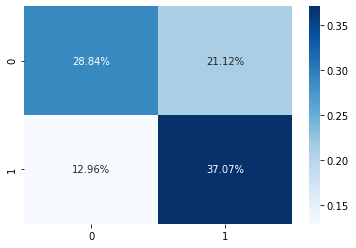

In [ ]:
#confusion matrix for train data set
sns.heatmap(train_cm/np.sum(train_cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
test_cm

array([[3965, 2972],
       [1774, 5123]])

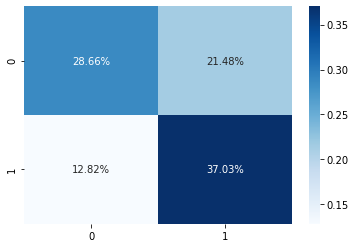

In [ ]:
#confusion matrix for train data set
sns.heatmap(test_cm/np.sum(test_cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
X1.columns

Index(['balance', 'campaign', 'pdays', 'previous', 'is_contacted_bef',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [ ]:
rf_optimal_model.feature_importances_

array([0.13276016, 0.22435225, 0.04833983, 0.07700121, 0.01037413,
       0.00451297, 0.00827436, 0.00336264, 0.00186719, 0.01152522,
       0.00587933, 0.00856663, 0.00312008, 0.00344877, 0.00857839,
       0.00324782, 0.00098729, 0.0095113 , 0.00653978, 0.00612235,
       0.00447455, 0.00858544, 0.00448741, 0.00615223, 0.00452097,
       0.00607926, 0.01146141, 0.01085399, 0.00617183, 0.0046785 ,
       0.10890439, 0.01763031, 0.18714564, 0.01293778, 0.00159455,
       0.00730854, 0.01864151])

In [ ]:
importances = rf_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X1.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
new_df=importance_df.sort_values(by=['Feature Importance'],ascending=False)
new_df

,Feature,Feature Importance
1,campaign,0.22
32,contact_unknown,0.19
0,balance,0.13
30,contact_cellular,0.11
3,previous,0.08
2,pdays,0.05
31,contact_telephone,0.02
36,poutcome_unknown,0.02
18,marital_married,0.01
28,loan_no,0.01


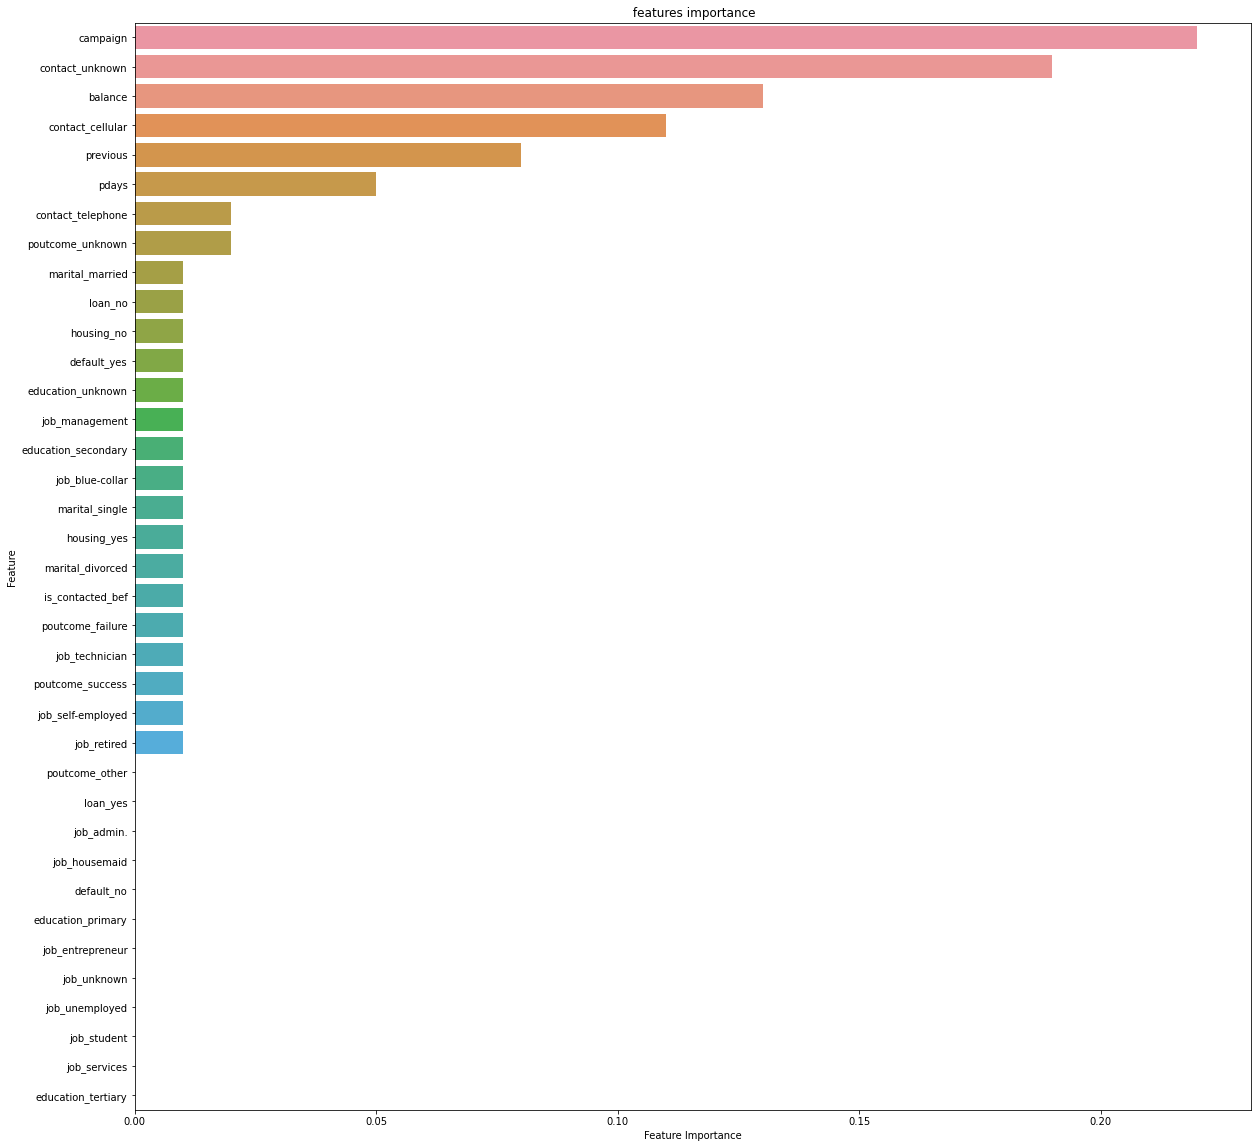

In [ ]:
plt.figure(figsize=(20,20))
plt.title(' features importance')
sns.barplot(x='Feature Importance',y="Feature",data=new_df)

#**Applying XGboost algorithem to our DataSet**

In [ ]:
# Number of trees
n_estimators = [50,80,100,120]

# Maximum depth of trees
max_depth = [3,5,7]

learning_rate=[0.1,0.3,0.5]

# HYperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'learning_rate':learning_rate}

In [ ]:
# Create an instance of the  XGBClassifier
xgb_model = xgb.XGBClassifier()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_xgb,cv = 5, verbose=2, scoring='roc_auc')

xgb_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=50, total=   2.4s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=50, total=   2.4s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................
[CV] .. learning_rate=0.1, max_depth=3, n_estimators=50, total=   2.4s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................
[CV] .. learning_rate=0.1, max_depth=3, n_estimators=50, total=   2.4s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................
[CV] .. learning_rate=0.1, max_depth=3, n_estimators=50, total=   2.4s
[CV] learning_rate=0.1, max_depth=3, n_estimators=80 .................
[CV] .. learning_rate=0.1, max_depth=3, n_estimators=80, total=   3.7s
[CV] learning_rate=0.1, max_depth=3, n_estimators=80 .................
[CV] .. learning_rate=0.1, max_depth=3, n_estimators=80, total=   3.9s
[CV] learning_rate=0.1, max_depth=3, n_estimators=80 .................
[CV] .. learning_rate=0.1, max_depth=3, n_estimators=80, total=   3.7s
[CV] learning_rate=0.1, max_depth=3, n_estimators=80 .................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 19.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 80, 100, 120]},
       

In [ ]:
xgb_grid.best_params_

{'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 120}

In [ ]:
xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=120, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_optimal_model = xgb_grid.best_estimator_

In [ ]:
# Making predictions on train and test data

xgb_train_class_preds = xgb_optimal_model.predict(X_train)
xgb_test_class_preds = xgb_optimal_model.predict(X_test)


# Get the probabilities on train and test
xgb_train_preds = xgb_optimal_model.predict_proba(X_train)[:,1]
xgb_test_preds = xgb_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
# Calculating accuracy on train and test
xgb_train_accuracy = accuracy_score(Y_train,xgb_train_class_preds)
xgb_test_accuracy = accuracy_score(Y_test,xgb_test_class_preds)

print("The accuracy on train dataset is", xgb_train_accuracy)
print("The accuracy on test dataset is", xgb_test_accuracy)

The accuracy on train dataset is 0.8798387971229262
The accuracy on test dataset is 0.8463206592453376


In [ ]:
# Get the confusion matrices for train and test
xgb_train_cm = confusion_matrix(Y_train,xgb_train_class_preds)
xgb_test_cm = confusion_matrix(Y_test,xgb_test_class_preds )

In [ ]:
xgb_train_cm

array([[25113,  2534],
       [ 4115, 23572]])

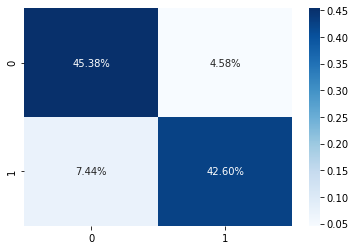

In [ ]:
#confusion matrix for train data set
sns.heatmap(xgb_train_cm/np.sum(xgb_train_cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
xgb_test_cm

array([[6106,  831],
       [1295, 5602]])

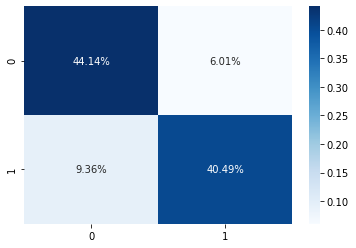

In [ ]:
#confusion matrix for test data set
sns.heatmap(xgb_test_cm/np.sum(xgb_test_cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
# Get the roc_auc score for train and test dataset
xgb_train_auc = roc_auc_score(Y_train,xgb_train_preds)
xgb_test_auc = roc_auc_score(Y_test,xgb_test_preds)

In [ ]:
print('Train roc_auc= ',xgb_train_auc)
print('Test roc_auc= ',xgb_test_auc)

Train roc_auc=  0.9583835622806072
Test roc_auc=  0.9282331659974463


In [ ]:
xgb_train_auc

0.9583835622806072

In [ ]:
xgb_test_auc

0.9282331659974463

In [ ]:
importances = xgb_optimal_model.feature_importances_

importance_dict_xgb = {'Feature' : list(X1.columns),
                   'Feature Importance' : importances}

importance_xgb_df = pd.DataFrame(importance_dict_xgb)

In [ ]:
importance_xgb_df['Feature Importance'] = round(importance_xgb_df['Feature Importance'],2)

In [ ]:
fim_df=importance_xgb_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
fim_df

,Feature,Feature Importance
32,contact_unknown,0.11
1,campaign,0.07
11,job_self-employed,0.06
3,previous,0.06
7,job_entrepreneur,0.06
15,job_unemployed,0.05
23,education_unknown,0.05
17,marital_divorced,0.04
24,default_no,0.04
8,job_housemaid,0.04


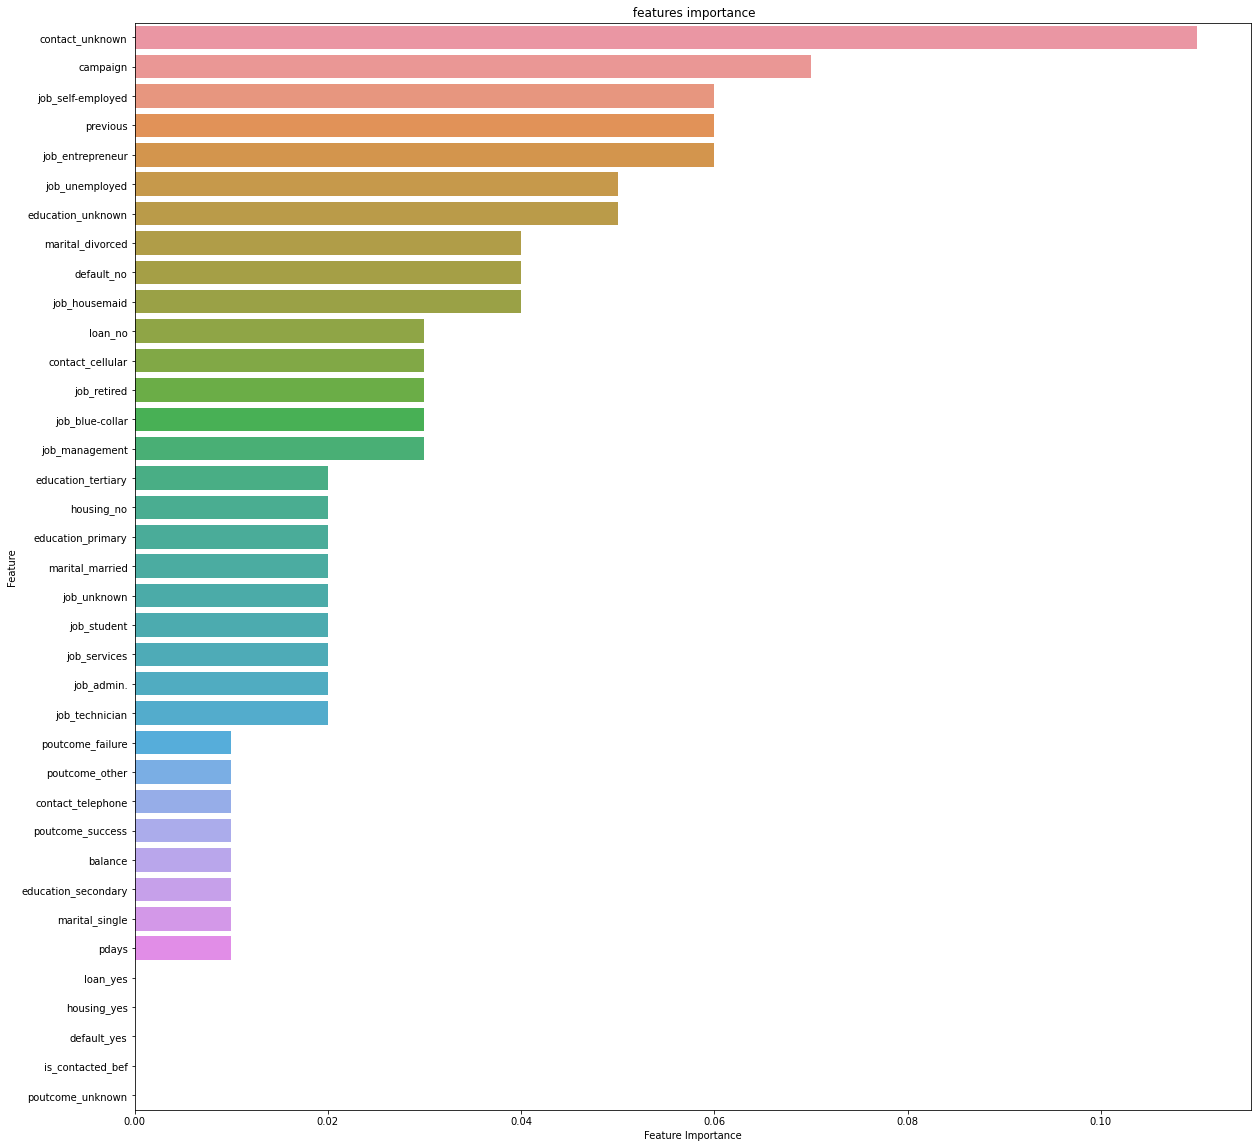

In [ ]:
plt.figure(figsize=(20,20))
plt.title(' features importance')
sns.barplot(x='Feature Importance',y="Feature",data=fim_df)

#**Applying LogisticRegression algorithem to our DataSet**

In [ ]:
from sklearn.linear_model import LogisticRegression
#C value in logistic Regression
C= [0.1,0.3,0.5,0.7,0.9,1,3,5]
#maximum iteration 
max_iter=[3000]


# HYperparameter Grid
param_lr = {'C' : C,
              'max_iter' : max_iter}

In [ ]:
lr_model = LogisticRegression()

# Grid search
lr_grid = GridSearchCV(estimator=lr_model,
                       param_grid = param_lr,
                       cv = 5, verbose=2, scoring='roc_auc')

lr_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=0.1, max_iter=3000 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=0.1, max_iter=3000, total=   1.5s
[CV] C=0.1, max_iter=3000 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ............................. C=0.1, max_iter=3000, total=   1.5s
[CV] C=0.1, max_iter=3000 ............................................
[CV] ............................. C=0.1, max_iter=3000, total=   1.3s
[CV] C=0.1, max_iter=3000 ............................................
[CV] ............................. C=0.1, max_iter=3000, total=   1.6s
[CV] C=0.1, max_iter=3000 ............................................
[CV] ............................. C=0.1, max_iter=3000, total=   1.2s
[CV] C=0.3, max_iter=3000 ............................................
[CV] ............................. C=0.3, max_iter=3000, total=   2.2s
[CV] C=0.3, max_iter=3000 ............................................
[CV] ............................. C=0.3, max_iter=3000, total=   1.4s
[CV] C=0.3, max_iter=3000 ............................................
[CV] ............................. C=0.3, max_iter=3000, total=   2.1s
[CV] C=0.3, max_iter=3000 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1, 3, 5],
                         'max_iter': [3000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=2)

In [ ]:
lr_grid.best_estimator_

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_grid.best_params_

{'C': 5, 'max_iter': 3000}

In [ ]:
lr_optimal_model = lr_grid.best_estimator_

In [ ]:
# Making predictions on train and test data

train_class_preds_lr = lr_optimal_model.predict(X_train)
test_class_preds_lr = lr_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds_lr = lr_optimal_model.predict_proba(X_train)[:,1]
test_preds_lr = lr_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
# Calculating accuracy on train and test
train_accuracy_lr = accuracy_score(Y_train,train_class_preds_lr)
test_accuracy_lr = accuracy_score(Y_test,test_class_preds_lr)

print("The accuracy on train dataset is", train_accuracy_lr)
print("The accuracy on test dataset is", test_accuracy_lr)

The accuracy on train dataset is 0.6016373296707268
The accuracy on test dataset is 0.5947665172762758


In [ ]:
# Get the confusion matrices for train and test
train_cm_lr= confusion_matrix(Y_train,train_class_preds_lr)
test_cm_lr= confusion_matrix(Y_test,test_class_preds_lr)

In [ ]:
train_cm_lr

array([[13155, 14492],
       [ 7551, 20136]])

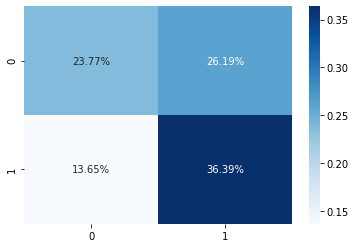

In [ ]:
#confusion matrix for train data set
sns.heatmap(train_cm_lr/np.sum(train_cm_lr), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
test_cm_lr

array([[3238, 3699],
       [1907, 4990]])

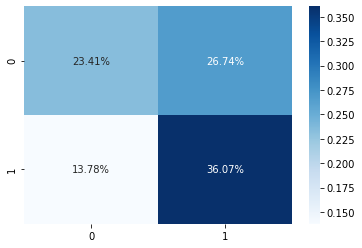

In [ ]:
#confusion matrix for test data set
sns.heatmap(test_cm_lr/np.sum(test_cm_lr), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
# Get the roc_auc score for train and test dataset
train_auc_lr = roc_auc_score(Y_train,train_preds_lr)
test_auc_lr = roc_auc_score(Y_test,test_preds_lr)

In [ ]:
print('Train roc_auc = ',train_auc_lr)
print('Test roc_auc = ',test_auc_lr)

Train roc_auc =  0.6335586602467728
Test roc_auc =  0.6237444713851996


#**Applying KNeighborsClassifier to our DataSet**

In [ ]:
n_neighbors=[5,7,9]

# HYperparameter Grid
param_knn = {'n_neighbors' : n_neighbors}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier()

# Grid search
knn_grid = GridSearchCV(estimator=knn_model,
                       param_grid = param_knn,
                       cv = 5, verbose=2, scoring='roc_auc')

knn_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... n_neighbors=5, total=  15.1s
[CV] n_neighbors=5 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.1s remaining:    0.0s


[CV] .................................... n_neighbors=5, total=  16.4s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=  15.7s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=  11.8s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=  15.0s
[CV] n_neighbors=7 ...................................................
[CV] .................................... n_neighbors=7, total=  15.3s
[CV] n_neighbors=7 ...................................................
[CV] .................................... n_neighbors=7, total=  16.1s
[CV] n_neighbors=7 ...................................................
[CV] .................................... n_neighbors=7, total=  15.6s
[CV] n_neighbors=7 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5, 7, 9]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='roc_auc',
             verbose=2)

In [ ]:
knn_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_grid.best_params_

{'n_neighbors': 5}

In [ ]:
knn_optimal_model = knn_grid.best_estimator_

In [ ]:
# Making predictions on train and test data

train_class_preds_knn = knn_optimal_model.predict(X_train)
test_class_preds_knn = knn_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds_knn = knn_optimal_model.predict_proba(X_train)[:,1]
test_preds_knn = knn_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
# Calculating accuracy on train and test
train_accuracy_knn = accuracy_score(Y_train,train_class_preds_knn)
test_accuracy_knn = accuracy_score(Y_test,test_class_preds_knn)

print("The accuracy on train dataset is", train_accuracy_knn)
print("The accuracy on test dataset is", test_accuracy_knn)

The accuracy on train dataset is 0.8484552492583749
The accuracy on test dataset is 0.7762986543192013


In [ ]:
# Get the confusion matrices for train and test
train_cm_knn= confusion_matrix(Y_train,train_class_preds_knn)
test_cm_knn= confusion_matrix(Y_test,test_class_preds_knn)

In [ ]:
train_cm_knn

array([[22859,  4846],
       [ 3532, 24047]])

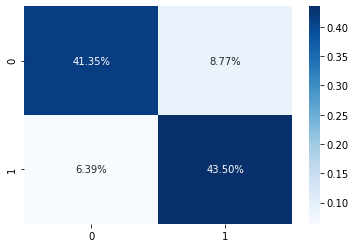

In [ ]:
#confusion matrix for train data set
sns.heatmap(train_cm_knn/np.sum(train_cm_knn), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
test_cm_knn

array([[5149, 1699],
       [1393, 5581]])

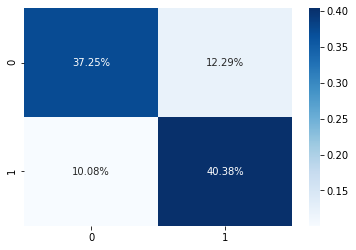

In [ ]:
#confusion matrix for test data
sns.heatmap(test_cm_knn/np.sum(test_cm_knn), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
# Get the roc_auc score for train and test dataset
train_auc_knn = roc_auc_score(Y_train,train_preds_knn)
test_auc_knn = roc_auc_score(Y_test,test_preds_knn)

In [ ]:
print('Train roc_auc_score  = ',train_auc_knn)
print('Test roc_auc_score = ',test_auc_knn)

Train roc_auc_score  =  0.9345105804533015
Test roc_auc_score =  0.8510231238558974


#**Applying GradientBoosting Algorithem to our DataSet**

In [ ]:
# Number of trees
n_estimators = [100,150]

# Maximum depth of trees
max_depth = [4,8,10]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_gb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the  GradientBoostingClassifier
gb_model= GradientBoostingClassifier()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_gb,
                       cv = 3, verbose=2, scoring='roc_auc')

gb_grid.fit(X_train,Y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  10.4s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  10.4s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  10.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=150 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=150, total=  15.8s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=150 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=150, total=  15.4s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=150 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=150, total=  15.5s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=100, total=  10.4s
[CV] max_depth=4, min_samples_leaf=40, 

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 25.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...e,
               

In [ ]:
gb_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 150}

In [ ]:
gb_grid.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=100,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
# Making predictions on train and test data

gb_train_class_preds = gb_optimal_model.predict(X_train)
gb_test_class_preds = gb_optimal_model.predict(X_test)


# Get the probabilities on train and test
gb_train_preds = gb_optimal_model.predict_proba(X_train)[:,1]
gb_test_preds = gb_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
# Calculating accuracy on train and test
gb_train_accuracy = accuracy_score(Y_train,gb_train_class_preds)
gb_test_accuracy = accuracy_score(Y_test,gb_test_class_preds)

print("The accuracy on train dataset is", gb_train_accuracy)
print("The accuracy on test dataset is", gb_test_accuracy)

The accuracy on train dataset is 0.8602486717027505
The accuracy on test dataset is 0.8416943761746422


In [ ]:
# Get the confusion matrices for train and test
gb_train_cm = confusion_matrix(Y_train,gb_train_class_preds)
gb_test_cm = confusion_matrix(Y_test,gb_test_class_preds )

In [ ]:
gb_train_cm

array([[24560,  3087],
       [ 4646, 23041]])

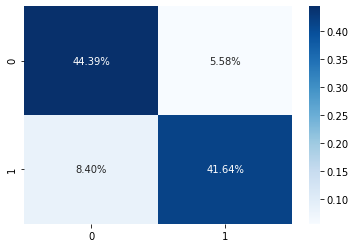

In [ ]:
#confusion matrix for train
sns.heatmap(gb_train_cm/np.sum(gb_train_cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
gb_test_cm

array([[6015,  922],
       [1268, 5629]])

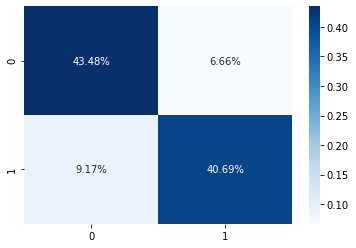

In [ ]:
#confusion matrix for test data
sns.heatmap(gb_test_cm/np.sum(gb_test_cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
# Get the roc_auc score for train and test dataset
gb_train_auc = roc_auc_score(Y_train,gb_train_preds)
gb_test_auc = roc_auc_score(Y_test,gb_test_preds)

In [ ]:
print("Train roc_auc_score = ",gb_train_auc)
print("Test roc_auc_score = ",gb_test_auc)

Train roc_auc_score =  0.9454512107385578
Test roc_auc_score =  0.9258634886872759


In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict_gb = {'Feature' : list(X1.columns),
                   'Feature Importance' : importances}

importance_gb_df = pd.DataFrame(importance_dict_gb)
importance_gb_df

,Feature,Feature Importance
0,balance,0.137931
1,campaign,0.394758
2,pdays,0.012815
3,previous,0.077653
4,is_contacted_bef,0.000384
5,job_admin.,0.010982
6,job_blue-collar,0.017897
7,job_entrepreneur,0.007713
8,job_housemaid,0.008667
9,job_management,0.019349


In [ ]:
importance_gb_df['Feature Importance'] = round(importance_gb_df['Feature Importance'],2)
importance_gb_df

,Feature,Feature Importance
0,balance,0.14
1,campaign,0.39
2,pdays,0.01
3,previous,0.08
4,is_contacted_bef,0.00
5,job_admin.,0.01
6,job_blue-collar,0.02
7,job_entrepreneur,0.01
8,job_housemaid,0.01
9,job_management,0.02


In [ ]:
fim_gb_df=importance_gb_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
fim_gb_df

,Feature,Feature Importance
1,campaign,0.39
0,balance,0.14
32,contact_unknown,0.08
3,previous,0.08
30,contact_cellular,0.02
6,job_blue-collar,0.02
9,job_management,0.02
21,education_secondary,0.02
29,loan_yes,0.01
28,loan_no,0.01


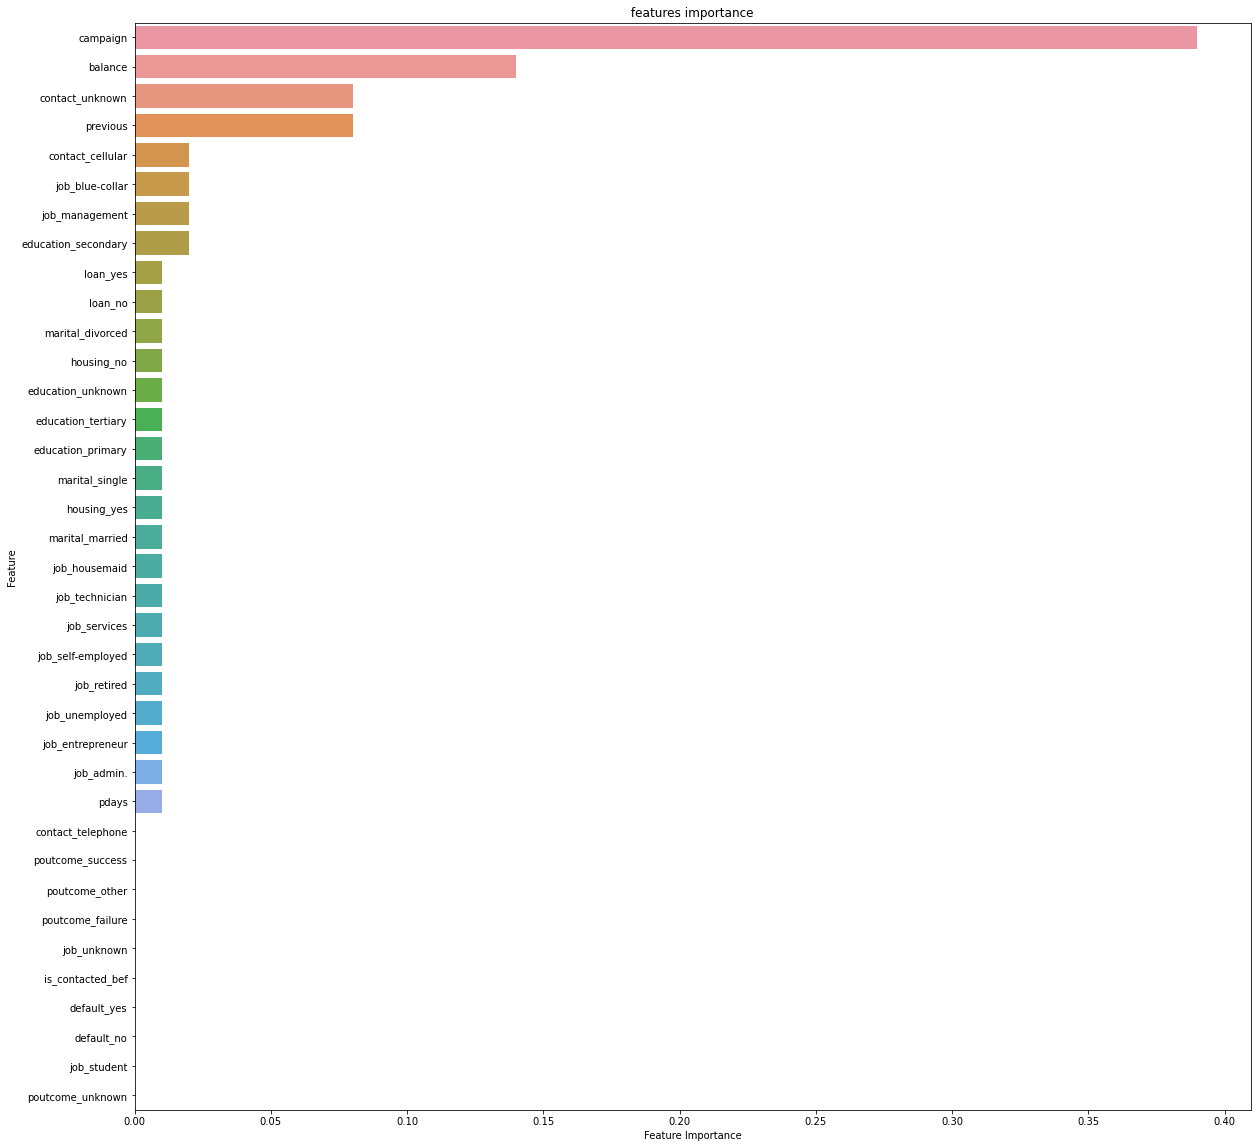

In [ ]:
plt.figure(figsize=(20,20))
plt.title(' features importance ')
sns.barplot(x='Feature Importance',y="Feature",data=fim_gb_df)

#**Applying DecisionTree algorithem to our DataSet**

In [ ]:


# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,16,20]

# HYperparameter Grid
param_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Grid search
dt_grid = GridSearchCV(estimator=dt_model,
                       param_grid = param_dt,
                       cv = 5, verbose=2, scoring='roc_auc')

dt_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=10 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=10, total=   0.2s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=20 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=20, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=20 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=20, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=20 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=20, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   24.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8],
                         'min

In [ ]:
dt_grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_grid.best_params_

{'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 10}

In [ ]:
dt_optimal_model = dt_grid.best_estimator_

In [ ]:
# Making predictions on train and test data

train_class_preds_dt = dt_optimal_model.predict(X_train)
test_class_preds_dt = dt_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds_dt = dt_optimal_model.predict_proba(X_train)[:,1]
test_preds_dt = dt_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
# Calculating accuracy on train and test
train_accuracy_dt = accuracy_score(Y_train,train_class_preds_dt)
test_accuracy_dt = accuracy_score(Y_test,test_class_preds_dt)

print("The accuracy on train dataset is", train_accuracy_dt)
print("The accuracy on test dataset is", test_accuracy_dt)

The accuracy on train dataset is 0.6967325694871146
The accuracy on test dataset is 0.6948098886800637


In [ ]:
# Get the confusion matrices for train and test
train_cm_dt= confusion_matrix(Y_train,train_class_preds_dt)
test_cm_dt= confusion_matrix(Y_test,test_class_preds_dt)

In [ ]:
train_cm_dt

array([[19769,  7878],
       [ 8903, 18784]])

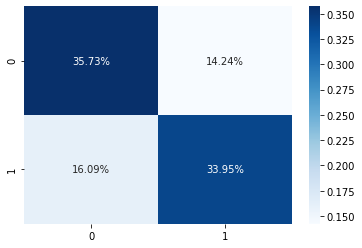

In [ ]:
#confusion matrix for train data set
sns.heatmap(train_cm_dt/np.sum(train_cm_dt), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
test_cm_dt

array([[4895, 2042],
       [2180, 4717]])

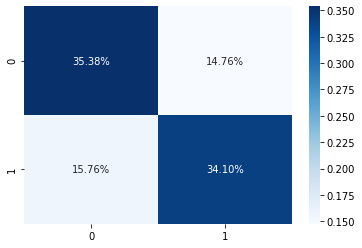

In [ ]:
#confusion matrix for test data
sns.heatmap(test_cm_dt/np.sum(test_cm_dt), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
# Get the roc_auc score for train and test dataset
train_auc_dt = roc_auc_score(Y_train,train_preds_dt)
test_auc_dt = roc_auc_score(Y_test,test_preds_dt)

In [ ]:
print('Train roc_auc score = ',train_auc_dt)
print('Test roc_auc score = ',test_auc_dt)

Train roc_auc score =  0.7818392182507063
Test roc_auc score =  0.7774911129262975


In [ ]:
importances = dt_optimal_model.feature_importances_

importance_dict_dt = {'Feature' : list(X1.columns),
                   'Feature Importance' : importances}

importance_dt_df = pd.DataFrame(importance_dict_dt)

In [ ]:
importance_dt_df

,Feature,Feature Importance
0,balance,0.131397
1,campaign,0.465949
2,pdays,0.004831
3,previous,0.146557
4,is_contacted_bef,0.000000
5,job_admin.,0.011852
6,job_blue-collar,0.002086
7,job_entrepreneur,0.000363
8,job_housemaid,0.000316
9,job_management,0.000199


In [ ]:
importance_dt_df['Feature Importance'] = round(importance_dt_df['Feature Importance'],2)
importance_dt_df

,Feature,Feature Importance
0,balance,0.13
1,campaign,0.47
2,pdays,0.00
3,previous,0.15
4,is_contacted_bef,0.00
5,job_admin.,0.01
6,job_blue-collar,0.00
7,job_entrepreneur,0.00
8,job_housemaid,0.00
9,job_management,0.00


In [ ]:
fim_dt=importance_dt_df.sort_values(by=['Feature Importance'],ascending=False)

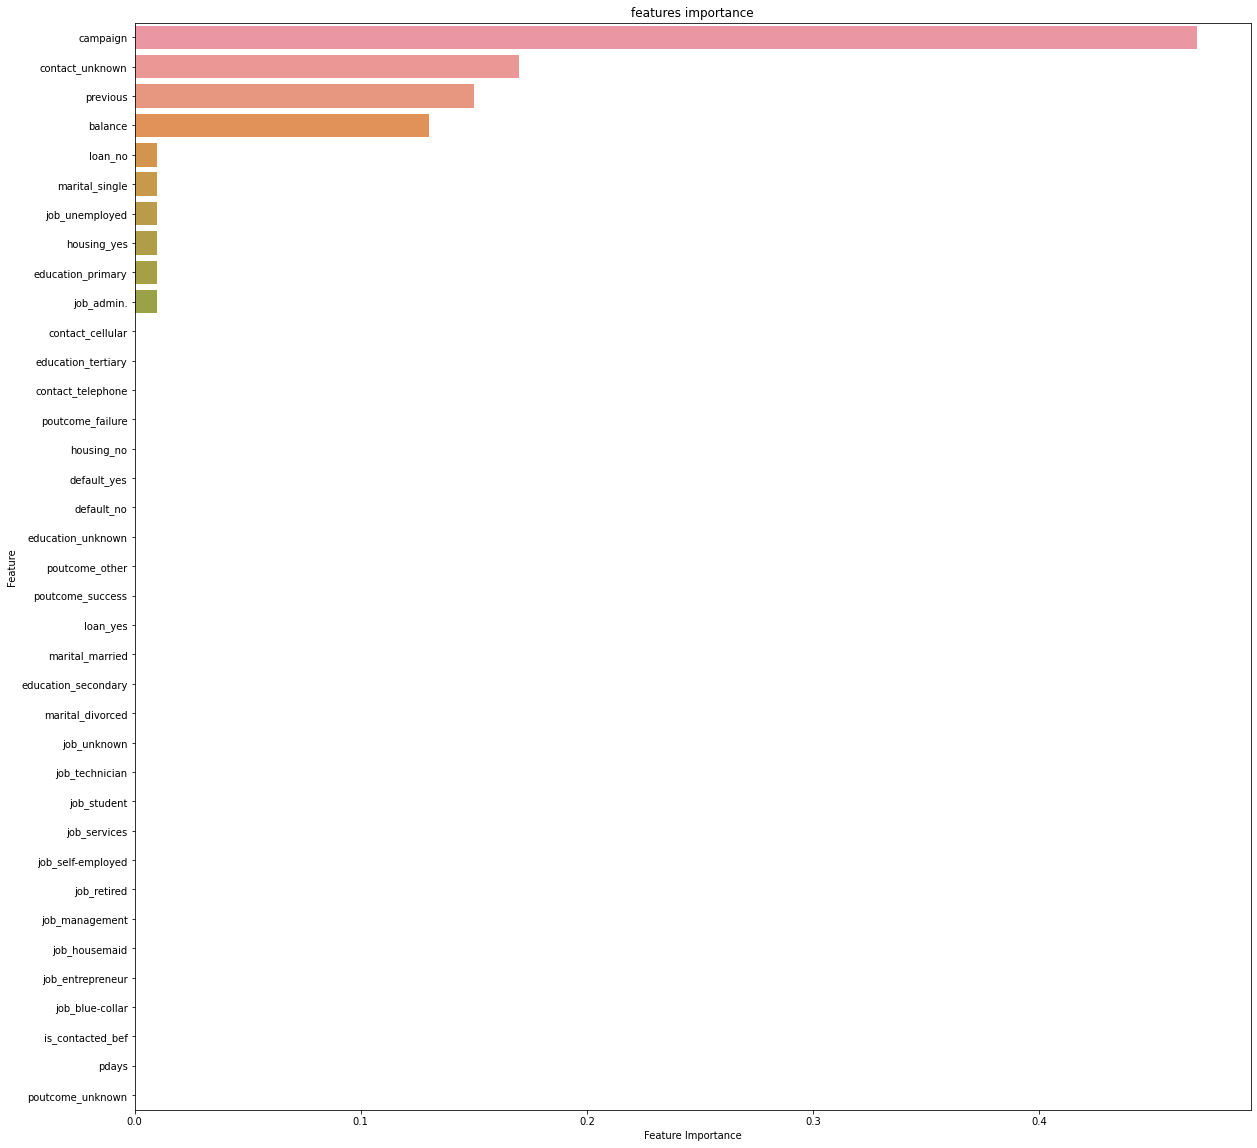

In [ ]:
plt.figure(figsize=(20,20))
plt.title('features importance')
sns.barplot(x='Feature Importance',y="Feature",data=fim_dt)

#**Model Summary**

In [ ]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Model Name", "Train roc_auc_score", "Test roc_auc_score", "Train accuracy_score","Test accuracy_score"]) 
  
# Add rows 
myTable.add_row(["XGBClassifier", "0.9583835622806072", "0.9282331659974463", "0.8798387971229262","0.8463206592453376"]) 
myTable.add_row(["GradientBoostingClassifier", "0.9454512107385578", "0.9258634886872759", "0.8602486717027505","0.8416943761746422"])
myTable.add_row(["RandomForestClassifier", "0.7583755701188906", "0.7522029339680062", "0.659142660931796","0.6569321960387451"]) 
myTable.add_row(["LogisticRegression", "  0.6335586602467728", " 0.6237444713851996", "  0.6016373296707268","0.5947665172762758"]) 
myTable.add_row(["KNeighborsClassifier", "0.9345105804533015", "0.8510231238558974", " 0.8484552492583749","0.7762986543192013"]) 
myTable.add_row(['DecisionTreeClassifier',' 0.7818392182507063','0.7774911129262975','0.6967325694871146','0.6948098886800637'])
  
print(myTable)

+----------------------------+----------------------+---------------------+----------------------+---------------------+
|         Model Name         | Train roc_auc_score  |  Test roc_auc_score | Train accuracy_score | Test accuracy_score |
+----------------------------+----------------------+---------------------+----------------------+---------------------+
|       XGBClassifier        |  0.9583835622806072  |  0.9282331659974463 |  0.8798387971229262  |  0.8463206592453376 |
| GradientBoostingClassifier |  0.9454512107385578  |  0.9258634886872759 |  0.8602486717027505  |  0.8416943761746422 |
|   RandomForestClassifier   |  0.7583755701188906  |  0.7522029339680062 |  0.659142660931796   |  0.6569321960387451 |
|     LogisticRegression     |   0.6335586602467728 |  0.6237444713851996 |   0.6016373296707268 |  0.5947665172762758 |
|    KNeighborsClassifier    |  0.963009897405959   |  0.852585435701905  |  0.8913326345465717  |  0.7894318346103802 |
|   DecisionTreeClassifier   |  